In [2]:
import FlowCytometryTools
from FlowCytometryTools import test_data_dir, test_data_file

# Loading the File

In [3]:
from FlowCytometryTools import FCMeasurement

datafile=r"pod17.fcs"
sample = FCMeasurement(ID='Test Sample', datafile=datafile)

## Channel Information

In [4]:
print(sample.channel_names)

('FSC-A', 'FSC-H', 'FSC-W', 'SSC-A', 'SSC-H', 'SSC-W', 'B220', 'CD3', 'CD4', 'CD11b', 'Ly6G', 'CD8', 'CD45', 'Time')


In [5]:
print(sample.channels)

                         $PnN    $PnR  $PnB    $PnE  $PnV  $PnG   $PnS
Channel Number                                                        
1                       FSC-A  262144    32  [0, 0]   560   1.0  FSC-A
2                       FSC-H  262144    32  [0, 0]   560   1.0  FSC-H
3                       FSC-W  262144    32  [0, 0]   560   1.0  FSC-W
4                       SSC-A  262144    32  [0, 0]   356   1.0  SSC-A
5                       SSC-H  262144    32  [0, 0]   356   1.0  SSC-H
6                       SSC-W  262144    32  [0, 0]   356   1.0  SSC-W
7                     BV421-A  262144    32  [0, 0]   403   1.0   B220
8                     BV786-A  262144    32  [0, 0]   511   1.0    CD3
9                     BB515-A  262144    32  [0, 0]   459   1.0    CD4
10                       PE-A  262144    32  [0, 0]   438   1.0  CD11b
11              PerCP-Cy5-5-A  262144    32  [0, 0]   588   1.0   Ly6G
12                      APC-A  262144    32  [0, 0]   623   1.0    CD8
13    

### Flow Cytometry Channels
- Forward Scatter = Cell Size
- Side Scatter = Cell Complexity
- Fluorescence = Idenntify target molecules using fluorophores

![image.png](images/flow-cells.png)

### Interpreting Side and Forward Scatter
Following a linear line going up to the right, cell's are larger and more ecomplex.
- Side Scatter -> Complexity of the cell's surface
- Forward Scatter -> Size of the cell

![image-2.png](images/size-complexity.png)

### Interpreting Fluorescence

![image-3.png](images/fluorescence.png)

### Example Flow Analysis of Immune Cells
![image.png](images/example-flow-immune.png)

### Compensation

## Experiment Information

### Antibodies to Differentiate Immune Cells
- CD45 = All mouse leukocytes express CD45
- CD3 = All mouse T cells are CD3+
- CD3+ = cells are then split into CD4 and CD8
- B220 = Mouse B cells are B220+
- Mouse Macrophages are CD11b+
- Mouse Neutrophils are Ly6G+

![image-3.png](images/differentiate.png)

### Aim
- Determinine which Ab (Antibody) is moving from each sample.
- Determine the relative quantity and types of immune cells in human peripheral blood sample.
### Methodology
1. Stain human peripheral blood sample for different conjugated antibodies for different immune cell surface markers.
2. Acquire data using flow cytometry.
3. Gate immune cell of interest based on unstained controls.
4. Compare different immune cell quantities by comparing fluorophore intensities.


## Full Metadata

In [109]:
print(type(sample.meta))

print(sample.meta.keys())

print(sample.meta['$SRC'])

<class 'dict'>
dict_keys(['__header__', '$BEGINANALYSIS', '$ENDANALYSIS', '$BEGINSTEXT', '$ENDSTEXT', '$BEGINDATA', '$ENDDATA', '$FIL', '$SYS', '$TOT', '$PAR', '$MODE', '$BYTEORD', '$DATATYPE', '$NEXTDATA', 'CREATOR', 'TUBE NAME', '$SRC', 'EXPERIMENT NAME', 'GUID', '$DATE', '$BTIM', '$ETIM', '$CYT', 'SETTINGS', 'CYTNUM', 'WINDOW EXTENSION', 'EXPORT USER NAME', 'EXPORT TIME', '$OP', 'FSC ASF', 'AUTOBS', '$INST', 'LASER1NAME', 'LASER1DELAY', 'LASER1ASF', 'LASER2NAME', 'LASER2DELAY', 'LASER2ASF', 'LASER3NAME', 'LASER3DELAY', 'LASER3ASF', '$TIMESTEP', 'SPILL', 'APPLY COMPENSATION', 'THRESHOLD', 'P1DISPLAY', 'P1BS', 'P1MS', 'P2DISPLAY', 'P2BS', 'P2MS', 'P3BS', 'P3MS', 'P4DISPLAY', 'P4BS', 'P4MS', 'P5DISPLAY', 'P5BS', 'P5MS', 'P6BS', 'P6MS', '$P7S', 'P7DISPLAY', 'P7BS', 'P7MS', '$P8S', 'P8DISPLAY', 'P8BS', 'P8MS', '$P9S', 'P9DISPLAY', 'P9BS', 'P9MS', '$P10S', 'P10DISPLAY', 'P10BS', 'P10MS', '$P11S', 'P11DISPLAY', 'P11BS', 'P11MS', '$P12S', 'P12DISPLAY', 'P12BS', 'P12MS', '$P13S', 'P13DISPLAY

## Accessing Raw Data

In [110]:
print(sample.data[['FSC-A', 'FSC-H', 'FSC-W']][:10])

          FSC-A         FSC-H          FSC-W
0  46722.929688  45453.359375   93227.781250
1  14221.098633  14319.768555   73906.226562
2  60661.519531  58828.964844   95289.210938
3   5677.186523   5651.974609   60033.796875
4  10921.922852  11029.405273   69918.242188
5  82572.906250  78110.312500  108193.570312
6  11637.164062  11623.435547   69633.171875
7  39970.750000  39382.488281   86186.789062
8  19476.113281  19484.732422   80923.812500
9  53350.332031  52023.328125   96250.632812


# Transformations

In [111]:
tsample = sample.transform('hlog', channels=['FSC-A','FSC-H','FSC-W'], b=500.0)

# Plotting

In [112]:
from pylab import *

## 1D Histograms

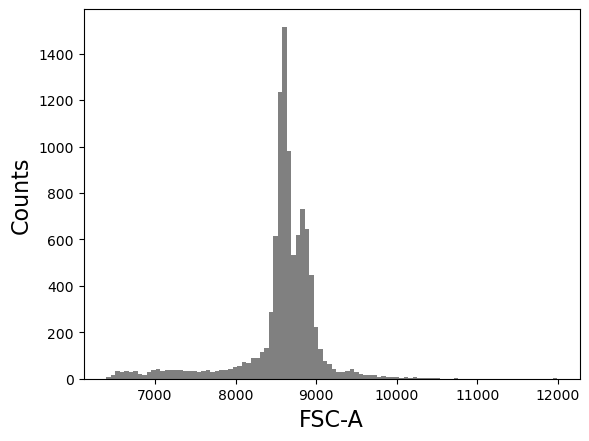

In [113]:
figure();
tsample.plot(['FSC-A'], bins=100);

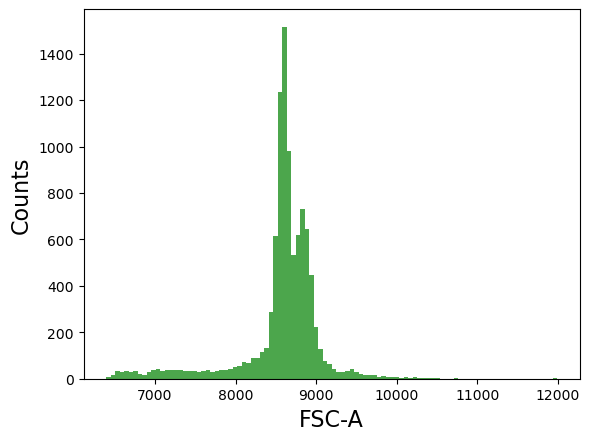

In [114]:
figure();
grid(True);
tsample.plot(['FSC-A'], color='green', alpha=0.7, bins=100);

## 2D Histograms

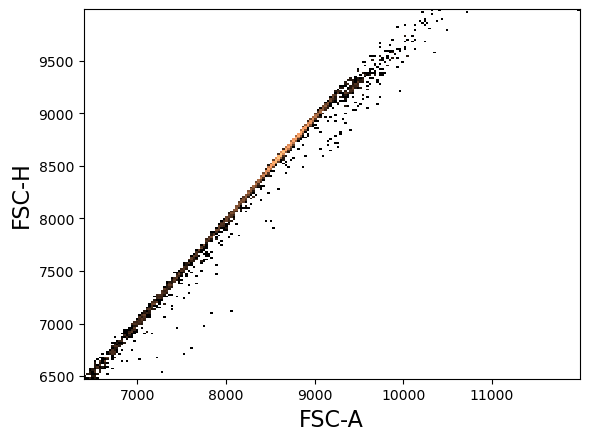

In [115]:
figure();
tsample.plot(['FSC-A', 'FSC-H']);

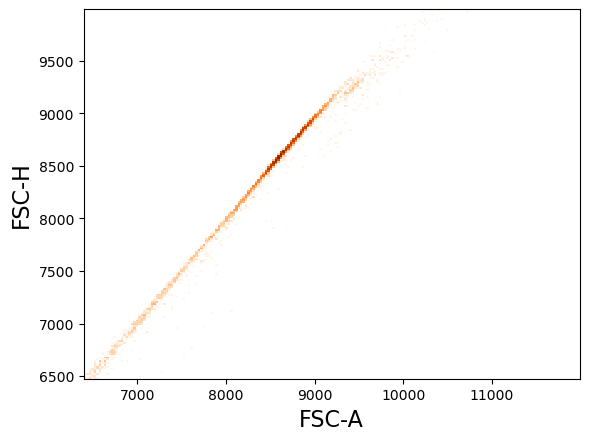

In [116]:
figure();
tsample.plot(['FSC-A', 'FSC-H'], cmap=cm.Oranges, colorbar=False);

## 2D Scatterplots

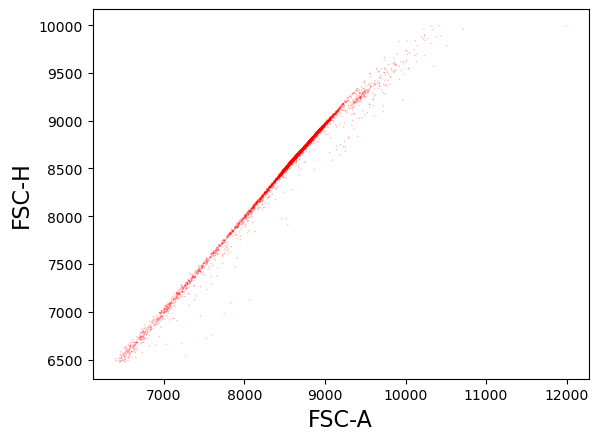

In [117]:
figure();
tsample.plot(['FSC-A', 'FSC-H'], kind='scatter', color='red', s=1, alpha=0.3);

# Gating

In [118]:
from FlowCytometryTools import ThresholdGate, PolyGate